# Análisis de Estilo en Portafolios

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.picpedia.org/finance/images/stock-portfolio.jpg" width="400px" height="400px" />

> Al analizar si invertir o no en un portafolio (fondo de inversión), nos podríamos preguntar qué tan bueno es el administrador de dicho fondo.

> Bien, esto nos lleva a preguntarnos cómo es que se conforma un portafolio, cuál es el proceso mediante el cual se seleccionan los activos.

> Se puede consultar que los portafolios se venden con ciertas tendencias claramente marcadas (portafolios de compañías de alta capitalización, portafolios de compañías de baja capitalización, portafolios de compañías con baja diferencia de valor en libros y valor bursátil, ...).

> Entonces, surgen dos preguntas:
> 1. ¿Presenta en realidad el portafolio un comportamiento acorde al estilo que se promete?
> 2. Si los activos que conforman el portafolio pertenecen a un grupo selecto, ¿qué tan bueno es el administrador escogiendo dichos activos?

**Objetivos**

- Descomponer el exceso de rendimientos de un portafolio, en los *rendimientos debidos al estilo* y los *rendimientos debidos a la selección*.

- *rendimiento debido a la selección* = resta entre rendimiento del portafolio, y una mezcla pasiva de estilos similares.

**Solo el rendimiento debido a la selección se le puede atribuir al talento del administrador.**
___

## 1. Fundamentos básicos

- El análisis de estilo es una técnica poderosa y sofisticada para medir qué tan bueno es un administrador de fondos.

- Describe qué tan bueno es un administrador, analizando estadísticamente cómo los rendimientos del portafolio actúan, contra los rendimientos de lo que incluye el portafolio.

- En realidad nos interesa poco qué activos individuales contiene el portafolio. Más bien, miramos cómo se relaciona a diferentes estilos de inversión.

- Pero, ¿qué es un estilo de inversión?
 - Se puede pensar como un índice (método de inversión pasiva), o un *benchmark* (inversión base para comparar).
 
- Podemos pensar como si partiéramos el mercado en una matriz tres por tres, basados en la capitalización y en la diferencia entre valor en libros y valor de mercado.

|                                |                                |                               |
| ------------------------------ | ------------------------------ | ----------------------------- |
| Alta capitalización, Alta BM   | Alta Capitalización, Medio BM  | Alta Capitalización, Bajo BM  |
| Media capitalización, Alta BM  | Media Capitalización, Medio BM | Media Capitalización, Bajo BM |
| Baja capitalización, Alta BM   | Baja Capitalización, Medio BM  | Baja Capitalización, Bajo BM  |

- Entonces, por ejemplo, un administrador de fondos que invierte mayormente en activos de baja capitalización, diríamos que sigue un *estilo de baja capitalización*.

- Cabe destacar que estos no son los únicos estilos de inversión: también hay *estilo de bonos de gobierno*, por ejemplo.

Entonces, el análisis de estilo puede ser usado en varias formas:

1. Demostrar que un fondo de inversión sigue el objetivo que se plantea (si es de baja capitalización, etc)

2. Para descubrir cuál es el verdadero estilo de inversión del portafolio.

3. Evaluar que tan bueno es el administrador del fondo seleccionando los activos adecuados dentro del estilo prometido (valuación).

## 2. ¿Cómo se hace?

- Para explorar el funcionamiento del análisis de estilo, analizaremos el fondo **Vanguard Small-Cap Index Fund Admiral Shares (VSMAX)**.

- También necesitaremos los índices que marcan los diferentes estilos de inversión. Para ello usaremos las esquinas RUSSELL:
 - Russell 1000 Growth (^RLG)
 - Russell 1000 Value (^RLV)
 - Russell 2000 Growth (^RUO)
 - Russell 2000 Value (^RUJ)

Descarguemos datos diarios en los últimos 5 años.

In [1]:
# Importamos librerías
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline

yf.pdr_override()

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers,
                   start_date=None,
                   end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(
        tickers=tickers,
        start=start_date,
        end=end_date
    )
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
# Nombres de instrumentos que vamos a importar
tickers = ["VSMAX", "^RLV", "^RLG", "^RUJ", "^RUO"]
# Fechas de inicio y fin
start = "2018-04-01"

In [4]:
# Descargamos datos
closes = get_adj_closes(tickers, start)

[*********************100%***********************]  5 of 5 completed


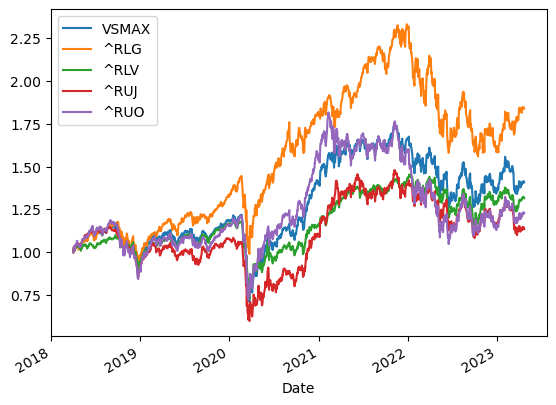

In [6]:
# Graficamos
(closes / closes.iloc[0]).plot();

Obtenemos rendimientos

In [7]:
# Rendimientos diarios
ret = closes.pct_change().dropna()

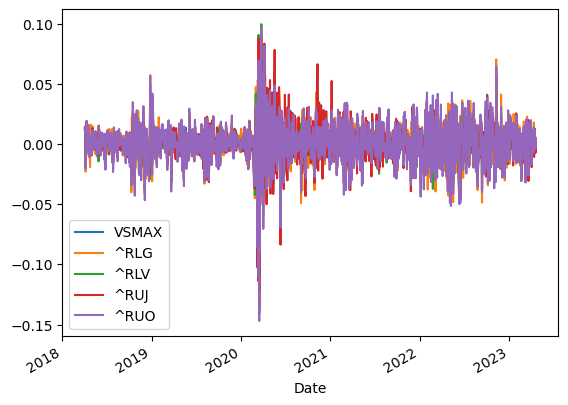

In [8]:
# Graficamos
ret.plot();

El análisis de estilo no es más que una regresión lineal de los (excesos de) rendimientos del portafolio que se va a analizar (*variable dependiente*), respecto a los diferentes estilos de inversión (*variables independientes o explicativas*).

1. De forma que se asignan pesos (o ponderaciones) a cada uno de los estilos elegidos y una ponderación adicional como intercepto <font color=blue> (ver en el tablero)</font>.

 $$r_{p,t}=\alpha+w_1I_{1,t}+w_2I_{2,t}+\dots+w_nI_{n,t}+\epsilon_t,$$
 
 donde $\epsilon_t$ es el término de error (residual). Se incluye la restricción de que dichos pesos deben sumar uno (1), para interpretarlos como porcentajes:
 
 $$w_1+w_2+\dots+w_n=1.$$

2. Se calculan los residuales (error) al cuadrado en cada paso, y se minimiza el total: **mínimos cuadrados**.
 
 <font color=blue> (ver en el tablero)</font>.
 
 $$\min_{\alpha,w_1,\dots,w_n} \sum_{t=0}^T\epsilon_t^2=\sum_{t=0}^T\left(r_{p,t}-\alpha-w_1I_{1,t}-w_2I_{2,t}-\dots-w_nI_{n,t}\right)^2$$
 
 sujeto a $w_1+w_2+\dots+w_n=1.$

3. Calcular el estadístico $R$-cuadrado: en qué porcentaje la variación de los rendimientos de los índices explican la variación de los rendimientos del portafolio.

 $$R^2=1-\frac{var(\epsilon)}{var(r_p)}$$

Entonces, necesitamos un optimizador

In [9]:
# Importamos la librería optimize de scipy
from scipy.optimize import minimize

Debemos escribir la función a optimizar

In [10]:
# Función a minimizar (residuales)
def min_sq(w, r, I1, I2, I3, I4):
    alpha = w[0]
    w1 = w[1]
    w2 = w[2]
    w3 = w[3]
    w4 = w[4]
    resid = r - (alpha + w1 * I1 + w2 * I2 + w3 * I3 + w4 * I4)
    return (resid**2).mean()

Datos de entrada al optimizador

In [11]:
# Datos
r = ret["VSMAX"]
r

Date
2018-04-03 00:00:00-04:00    0.012655
2018-04-04 00:00:00-04:00    0.010485
2018-04-05 00:00:00-04:00    0.007250
2018-04-06 00:00:00-04:00   -0.019334
2018-04-09 00:00:00-04:00    0.000144
                               ...   
2023-04-17 00:00:00-04:00    0.008889
2023-04-18 00:00:00-04:00   -0.000991
2023-04-19 00:00:00-04:00    0.001764
2023-04-20 00:00:00-04:00   -0.005392
2023-04-21 00:00:00-04:00    0.000664
Name: VSMAX, Length: 1273, dtype: float64

In [13]:
I1 = ret["^RLV"]
I2 = ret["^RLG"]
I3 = ret["^RUJ"]
I4 = ret["^RUO"]
I1

Date
2018-04-03 00:00:00-04:00    0.013588
2018-04-04 00:00:00-04:00    0.009282
2018-04-05 00:00:00-04:00    0.007284
2018-04-06 00:00:00-04:00   -0.020091
2018-04-09 00:00:00-04:00    0.002957
                               ...   
2023-04-17 00:00:00-04:00    0.005048
2023-04-18 00:00:00-04:00    0.000432
2023-04-19 00:00:00-04:00   -0.000373
2023-04-20 00:00:00-04:00   -0.006717
2023-04-21 00:00:00-04:00    0.000481
Name: ^RLV, Length: 1273, dtype: float64

Restricciones

In [14]:
# Restricciones
cons = {"type": "eq", "fun": lambda w: w[1] + w[2] + w[3] + w[4] - 1}

In [16]:
bnds = ((None, None),) + ((0, 1),) * 4
bnds

((None, None), (0, 1), (0, 1), (0, 1), (0, 1))

In [17]:
w0 = [0, 0.25, 0.25, 0.25, 0.25]

Resolvemos

In [20]:
# Resolvemos
style = minimize(
    fun=min_sq,
    x0=w0,
    args=(r, I1, I2, I3, I4),
    bounds=bnds,
    constraints=cons,
    tol=1e-10
)

In [22]:
minimize?

In [21]:
style

     fun: 3.946711806218298e-06
     jac: array([2.88772327e-06, 3.25977561e-06, 7.14048383e-07, 2.73186225e-06,
       1.16286753e-06])
 message: 'Optimization terminated successfully'
    nfev: 85
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([7.05636685e-05, 1.30752574e-01, 1.23986639e-01, 3.92513304e-01,
       3.52747483e-01])

In [23]:
w = style.x

In [24]:
# alpha
alpha = w[0]
alpha

7.056366848769938e-05

In [26]:
# '^RLV', '^RLG', '^RUJ', '^RUO'
w[1:]

array([0.13075257, 0.12398664, 0.3925133 , 0.35274748])

In [27]:
# Restricción
w[1:].sum()

1.0

### ¿Qué podemos concluir?

 - Russell 1000 Growth (^RLG)
 - Russell 1000 Value (^RLV)
 - Russell 2000 Growth (^RUO)
 - Russell 2000 Value (^RUJ)

Entonces, el fondo **Vanguard Small-Cap Index Fund Admiral Shares (VSMAX)**, está conformado en un

In [28]:
# w_1
w[1]

0.13075257420502467

por activos de alta capialización y con alta diferencia BM (Russell 1000 Value); está conformado en un

In [29]:
# w_2
w[2]

0.12398663862466418

por activos de alta capitalización con baja diferencia BM (Russell 1000 Growth); está conformado en un

In [30]:
# w_3
w[3]

0.3925133042915474

por activos de baja capitalización con alta diferencia BM (Russell 2000 Value); y está conformado en un

In [31]:
# w_4
w[4]

0.3527474828787638

por activos de baja capitalización con baja diferencia BM (Russell 2000 Growth). El restante

In [32]:
# alpha
alpha

7.056366848769938e-05

de los rendimientos diarios, **es atribuible al administrador del fondo por la selección particular de los activos.**

Por tanto, **el estilo predominante del fondo es de baja capitalizacion** ($\approx 70\%$).

Calculamos el $R^2$

In [33]:
# Calculamos residuales (error)
resid = r - (alpha + w[1] * I1 + w[2] * I2 + w[3] * I3 + w[4] * I4)
resid

Date
2018-04-03 00:00:00-04:00   -0.000478
2018-04-04 00:00:00-04:00   -0.001914
2018-04-05 00:00:00-04:00   -0.000191
2018-04-06 00:00:00-04:00    0.000286
2018-04-09 00:00:00-04:00   -0.000918
                               ...   
2023-04-17 00:00:00-04:00   -0.001202
2023-04-18 00:00:00-04:00    0.001953
2023-04-19 00:00:00-04:00   -0.000185
2023-04-20 00:00:00-04:00    0.000261
2023-04-21 00:00:00-04:00   -0.000119
Length: 1273, dtype: float64

In [34]:
# Calculamos Rsq
Rsq = 1 - np.var(resid) / np.var(r)
Rsq

0.9844186171084729

Estadísticamente, el modelo propuesto explica el $98.44\%$ de la variación total de los rendimientos del portafolio.

Gráficamente

In [38]:
from matplotlib import pyplot as plt

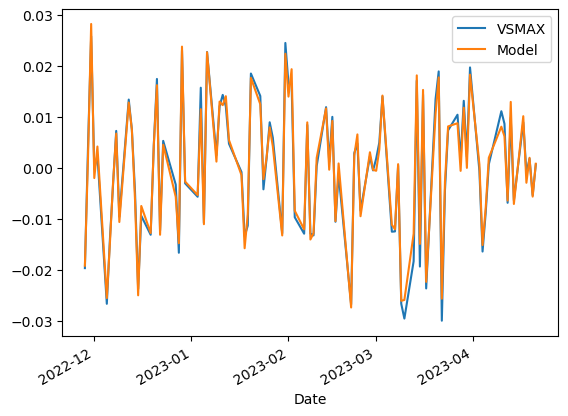

In [39]:
# Graficar los rendimientos del portafolio y los que se obtendrían con los índices
r[-100:].plot(label="VSMAX")
(alpha + w[1] * I1 + w[2] * I2 + w[3] * I3 + w[4] * I4)[-100:].plot(label="Model")
plt.legend()

# Anuncios parroquiales

## 1. Ver clase 0 para revisar objetivos.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>